In [1]:
import pandas as pd

In [2]:
data1 = pd.read_html('http://2689web.com/ind/2011088.html')
data2 = pd.read_html('http://npb.jp/bis/players/81785118.html')

In [3]:
data1

[         0          1        2             3          4           5
 0  すぎや・けんし    すぎや・けんし  すぎや・けんし       すぎや・けんし  wikipedia  google画像検索
 1    杉谷　拳士  1991.2.4生     右投両打  帝京高（2008年6位）  wikipedia  google画像検索,
       0     1           2     3    4     5     6    7    8   9   ...    26  \
 0      年     年          球団    背番   試合    打席    打数   得点   安打  二塁  ...    打率   
 1   2009  平成21  日本ハムファイターズ    61    -     -     -    -    -   -  ...     -   
 2   2010  平成22  日本ハムファイターズ    61    -     -     -    -    -   -  ...     -   
 3   2011  平成23  日本ハムファイターズ    61   50   110    92    9   17   3  ...  .185   
 4   2012  平成24  日本ハムファイターズ    61   58   133   115   11   27   3  ...  .235   
 5   2013  平成25  日本ハムファイターズ    61   55   165   141   11   28   5  ...  .199   
 6   2014  平成26  日本ハムファイターズ    61   87   146   123   21   25   4  ...  .203   
 7   2015  平成27  日本ハムファイターズ    61   84   192   166   25   49   5  ...  .295   
 8   2016  平成28  日本ハムファイターズ     2   62   138   104   11   25   5  ...  .240   
 9

In [4]:
outf = data1[2]

In [5]:
second = outf[[0,23,24,25,26,27,28]]

In [6]:
defence = outf[[0,41,42,43,44,45,46]]

In [7]:
defence=defence[:-1]

In [8]:
defence.columns=['年度','試合','刺殺','捕殺','失策','併殺','守備率']

In [9]:
defence=defence.drop([0,1,2,3])

In [10]:
defence = defence.reset_index(drop=True)

In [11]:
defence.dtypes

年度     object
試合     object
刺殺     object
捕殺     object
失策     object
併殺     object
守備率    object
dtype: object

In [12]:
game = outf[[0,4,10,17,23,29,35,41]]

In [13]:
game.columns=['年度','投手','捕手','一塁手','二塁手','三塁手','遊撃手','外野手']

In [14]:
game=game[2:]

In [15]:
game.reset_index(inplace=True)

In [16]:
game = game.drop('index',axis=1)

In [17]:
game = game.fillna(0)

In [18]:
game = game.replace('-',0)

In [19]:
game.to_csv('sugiya_games.csv',index=False)

In [20]:
game

,年度,投手,捕手,一塁手,二塁手,三塁手,遊撃手,外野手
0,2009,0,0,0,0,0,0,0
1,2010,0,0,0,0,0,0,0
2,2011,0,0,0,16,0,0,20
3,2012,0,0,0,5,6,1,29
4,2013,0,0,3,10,1,0,33
5,2014,0,0,0,0,0,0,69
6,2015,0,0,0,18,5,0,68
7,2016,0,0,1,5,0,0,52
8,2017,0,0,0,14,2,0,14
9,2018,0,0,2,21,3,0,38


In [21]:
game= pd.read_csv('sugiya_games.csv')

In [22]:
game2 = game[['投手', '捕手', '一塁手', '二塁手', '三塁手', '遊撃手', '外野手']].astype(int)

In [23]:
game2['年度'] = game['年度']

In [24]:
game3 = pd.merge(game,game2,on='投手',how='inner')

In [25]:
game2 = game2.loc[:,['年度','投手', '捕手', '一塁手', '二塁手', '三塁手', '遊撃手', '外野手']]

In [26]:
game2

,年度,投手,捕手,一塁手,二塁手,三塁手,遊撃手,外野手
0,2009,0,0,0,0,0,0,0
1,2010,0,0,0,0,0,0,0
2,2011,0,0,0,16,0,0,20
3,2012,0,0,0,5,6,1,29
4,2013,0,0,3,10,1,0,33
5,2014,0,0,0,0,0,0,69
6,2015,0,0,0,18,5,0,68
7,2016,0,0,1,5,0,0,52
8,2017,0,0,0,14,2,0,14
9,2018,0,0,2,21,3,0,38


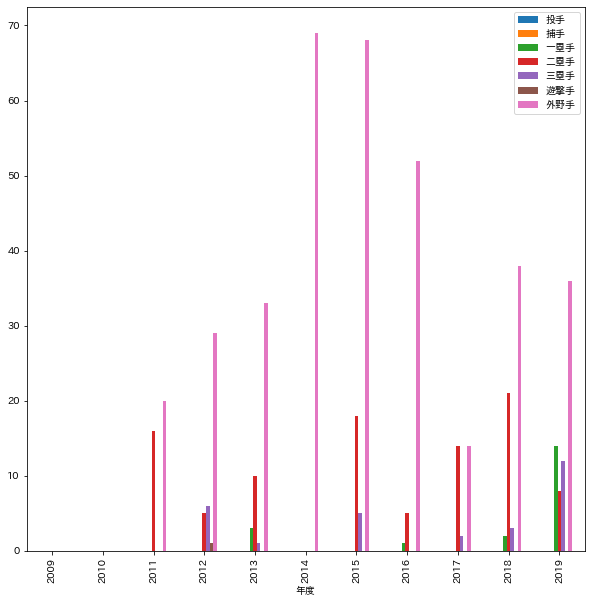

In [27]:
game2[:-1].plot(x='年度',kind='bar',figsize=(10,10))

In [28]:
sugiya = data2[1]

In [29]:
sugiya['年度'] = sugiya['年度'].astype(float)

In [30]:
sigiya = sugiya.fillna('国内通算')

In [31]:
neo_sugiya = sugiya[:-1]

In [32]:
neo_sugiya['年度'] = neo_sugiya['年度'].astype(int)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
neo_sugiya['年度'] = neo_sugiya['年度'].astype(str)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
neo_sugiya

,年度,所属球団,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,盗塁刺,犠打,犠飛,四球,死球,三振,併殺打,打率,長打率,出塁率
0,2011,北海道日本ハム,50,110,92,9,17,3,1,0,...,3,11,0,5,2,21,1,0.185,0.239,0.242
1,2012,北海道日本ハム,58,133,115,11,27,3,1,2,...,2,8,2,7,1,18,1,0.235,0.330,0.280
2,2013,北海道日本ハム,55,165,141,11,28,5,1,0,...,1,11,0,12,1,24,2,0.199,0.248,0.266
3,2014,北海道日本ハム,87,146,123,21,25,4,2,2,...,1,11,0,8,4,19,1,0.203,0.317,0.274
4,2015,北海道日本ハム,84,192,166,25,49,5,2,1,...,7,9,1,9,7,28,1,0.295,0.367,0.355
5,2016,北海道日本ハム,62,138,104,11,25,5,1,0,...,2,23,0,11,0,23,1,0.240,0.308,0.313
6,2017,北海道日本ハム,35,85,75,5,11,2,1,0,...,0,5,0,5,0,20,1,0.147,0.200,0.200
7,2018,北海道日本ハム,70,130,104,17,24,4,0,3,...,2,6,2,12,6,20,2,0.231,0.356,0.339
8,2019,北海道日本ハム,83,157,134,15,28,4,1,4,...,1,6,1,13,3,36,2,0.209,0.343,0.291


In [35]:
defence = data1[2]

In [36]:
defence=defence[:-1]

In [37]:
defence = defence[[0,41,42,43,44,45,46]]

In [38]:
defence.columns = ['年度','試合','刺殺','補殺','失策','併殺','守備率']

In [39]:
defence=defence[2:]

In [40]:
defence = defence.reset_index()

In [41]:
defence = defence.drop('index',axis=1)

In [42]:
sugiya_data = pd.merge(neo_sugiya,defence,on='年度',how='right')

In [43]:
pd.merge(neo_sugiya,defence,on='年度',how='outer')

,年度,所属球団,試合_x,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,併殺打,打率,長打率,出塁率,試合_y,刺殺,補殺,失策,併殺,守備率
0,2011,北海道日本ハム,50.0,110.0,92.0,9.0,17.0,3.0,1.0,0.0,...,1.0,0.185,0.239,0.242,20,24,0,0,0,1.000
1,2012,北海道日本ハム,58.0,133.0,115.0,11.0,27.0,3.0,1.0,2.0,...,1.0,0.235,0.330,0.280,29,31,1,0,0,1.000
2,2013,北海道日本ハム,55.0,165.0,141.0,11.0,28.0,5.0,1.0,0.0,...,2.0,0.199,0.248,0.266,33,57,2,0,0,1.000
3,2014,北海道日本ハム,87.0,146.0,123.0,21.0,25.0,4.0,2.0,2.0,...,1.0,0.203,0.317,0.274,69,60,1,2,0,.968
4,2015,北海道日本ハム,84.0,192.0,166.0,25.0,49.0,5.0,2.0,1.0,...,1.0,0.295,0.367,0.355,68,76,1,1,1,.987
5,2016,北海道日本ハム,62.0,138.0,104.0,11.0,25.0,5.0,1.0,0.0,...,1.0,0.240,0.308,0.313,52,56,2,1,0,.983
6,2017,北海道日本ハム,35.0,85.0,75.0,5.0,11.0,2.0,1.0,0.0,...,1.0,0.147,0.200,0.200,14,15,0,0,0,1.000
7,2018,北海道日本ハム,70.0,130.0,104.0,17.0,24.0,4.0,0.0,3.0,...,2.0,0.231,0.356,0.339,38,31,1,0,0,1.000
8,2019,北海道日本ハム,83.0,157.0,134.0,15.0,28.0,4.0,1.0,4.0,...,2.0,0.209,0.343,0.291,36,30,0,0,0,1.000
9,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-,-,-,-,-,-


In [44]:
sugiya_data = sugiya_data.dropna()

In [45]:
sugiya_data.to_csv('sugiya_kenshi.csv',index=False)

In [53]:
import pandas as pd
data = pd.read_csv('sugiya_kenshi.csv')

In [47]:
data.head()

,年度,所属球団,試合_x,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,併殺打,打率,長打率,出塁率,試合_y,刺殺,補殺,失策,併殺,守備率
0,2011,北海道日本ハム,50.0,110.0,92.0,9.0,17.0,3.0,1.0,0.0,...,1.0,0.185,0.239,0.242,20,24,0,0,0,1.000
1,2012,北海道日本ハム,58.0,133.0,115.0,11.0,27.0,3.0,1.0,2.0,...,1.0,0.235,0.330,0.280,29,31,1,0,0,1.000
2,2013,北海道日本ハム,55.0,165.0,141.0,11.0,28.0,5.0,1.0,0.0,...,2.0,0.199,0.248,0.266,33,57,2,0,0,1.000
3,2014,北海道日本ハム,87.0,146.0,123.0,21.0,25.0,4.0,2.0,2.0,...,1.0,0.203,0.317,0.274,69,60,1,2,0,0.968
4,2015,北海道日本ハム,84.0,192.0,166.0,25.0,49.0,5.0,2.0,1.0,...,1.0,0.295,0.367,0.355,68,76,1,1,1,0.987


In [48]:
import ProfessionalBaseballAnalytics as PBA

In [54]:
sugiya = PBA.CyberMetricsBatter(data)

計算終了


In [55]:
sugiya.columns

Index(['年度', '所属球団', '試合_x', '打席', '打数', '得点', '安打', '二塁打', '三塁打', '本塁打', '塁打',
       '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '死球', '三振', '併殺打', '打率', '長打率',
       '出塁率', '試合', '刺殺', '補殺', '失策', '併殺', '守備率', 'OPS', 'IsoP', 'IsoD',
       'BB/K', 'BABIP', 'RC', 'RC27', 'AB/HR', 'PA/K', 'PS', 'Spd', '簡易RF'],
      dtype='object')

In [56]:
sugiya.to_csv('sugiya_kenshi.csv',index=False)